# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective is to develop a predictive model for used car prices based on various vehicle attributes. This involves performing exploratory data analysis on the subset of 426K car listings to identify significant correlations between features and price. We'll then implement and compare multiple regression models, likely including linear regression, random forests, and gradient boosting methods, to predict car prices.

The project will involve data cleaning, feature engineering, and selection to determine the most influential factors affecting price. We'll use cross-validation and grid search for hyperparameter tuning to optimize model performance. The models will be evaluated using appropriate metrics such as R-squared, Mean Absolute Error (MAE), or Root Mean Square Error (RMSE) to assess their predictive accuracy.

The coefficients or feature importances from the best-performing model will be interpreted to identify the key drivers of used car prices, which will then be translated into actionable insights for the dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd

# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')

1. Display basic information about the DataFrame.

In [3]:
print(vehicles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

2. Show the first few rows of the DataFrame.

In [4]:
print(vehicles_df.head())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

3. Calculate and display summary statistics for numerical columns.

In [5]:
print(vehicles_df.describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


4. Check for missing values in each column.

In [6]:
missing_values = vehicles_df.isnull().sum()
missing_percentage = 100 * vehicles_df.isnull().sum() / len(vehicles_df)
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])
print(missing_table)

               Total    Percent
id                 0   0.000000
region             0   0.000000
price              0   0.000000
year            1205   0.282281
manufacturer   17646   4.133714
model           5277   1.236179
condition     174104  40.785232
cylinders     177678  41.622470
fuel            3013   0.705819
odometer        4400   1.030735
title_status    8242   1.930753
transmission    2556   0.598763
VIN           161042  37.725356
drive         130567  30.586347
size          306361  71.767476
type           92858  21.752717
paint_color   130203  30.501078
state              0   0.000000


5. Examine unique values in categorical columns.

In [7]:
categorical_columns = vehicles_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(vehicles_df[col].value_counts(dropna=False).head())


Unique values in region:
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: count, dtype: int64

Unique values in manufacturer:
manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: count, dtype: int64

Unique values in model:
model
f-150             8009
NaN               5277
silverado 1500    5140
1500              4211
camry             3135
Name: count, dtype: int64

Unique values in condition:
condition
NaN          174104
good         121456
excellent    101467
like new      21178
fair           6769
Name: count, dtype: int64

Unique values in cylinders:
cylinders
NaN            177678
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
Name: count, dtype: int64

Unique values in fuel:
fuel
gas       356209
other      30728
diesel     30062
hybrid      5170
NaN   

6. Check for potential outliers in numerical columns.

In [6]:
numerical_columns = vehicles_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    print(f"\nPotential outliers in {col}:")
    print(vehicles_df[col].describe())


Potential outliers in id:
count    4.268800e+05
mean     7.311487e+09
std      4.473170e+06
min      7.207408e+09
25%      7.308143e+09
50%      7.312621e+09
75%      7.315254e+09
max      7.317101e+09
Name: id, dtype: float64

Potential outliers in price:
count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

Potential outliers in year:
count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

Potential outliers in odometer:
count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64


7. Examine the distribution of the target variable (price).

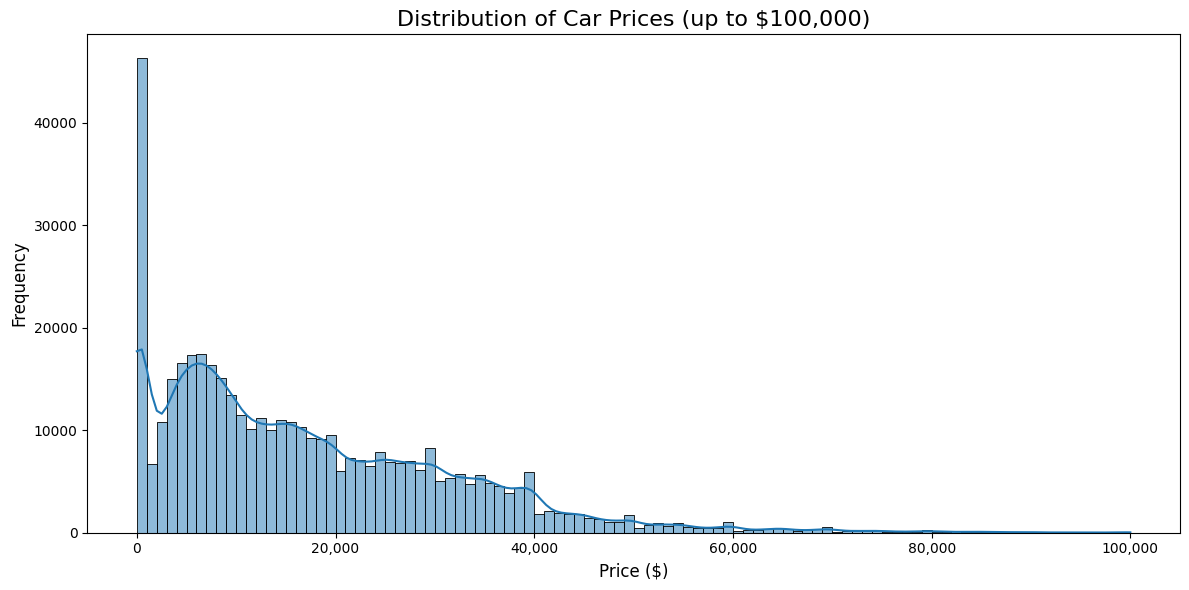

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_price_distribution(df, column='price', n_bins=100, max_price=None):
    plt.figure(figsize=(12, 6))

    # Set the maximum price to consider
    if max_price is None:
        max_price = df[column].quantile(0.99)  # Exclude top 1% to handle extreme outliers

    # Create the histogram plot
    sns.histplot(data=df[df[column] <= max_price], x=column, bins=n_bins, kde=True)

    # Add labels and title
    plt.title(f'Distribution of Car Prices (up to ${max_price:,.0f})', fontsize=16)
    plt.xlabel('Price ($)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Format x-axis labels
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

    plt.tight_layout()
    plt.show()

plot_price_distribution(vehicles_df, column='price', n_bins=100, max_price=100000)

8. Check for duplicate entries.

In [4]:
duplicates = vehicles_df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


9. Investigate correlations between numerical features.

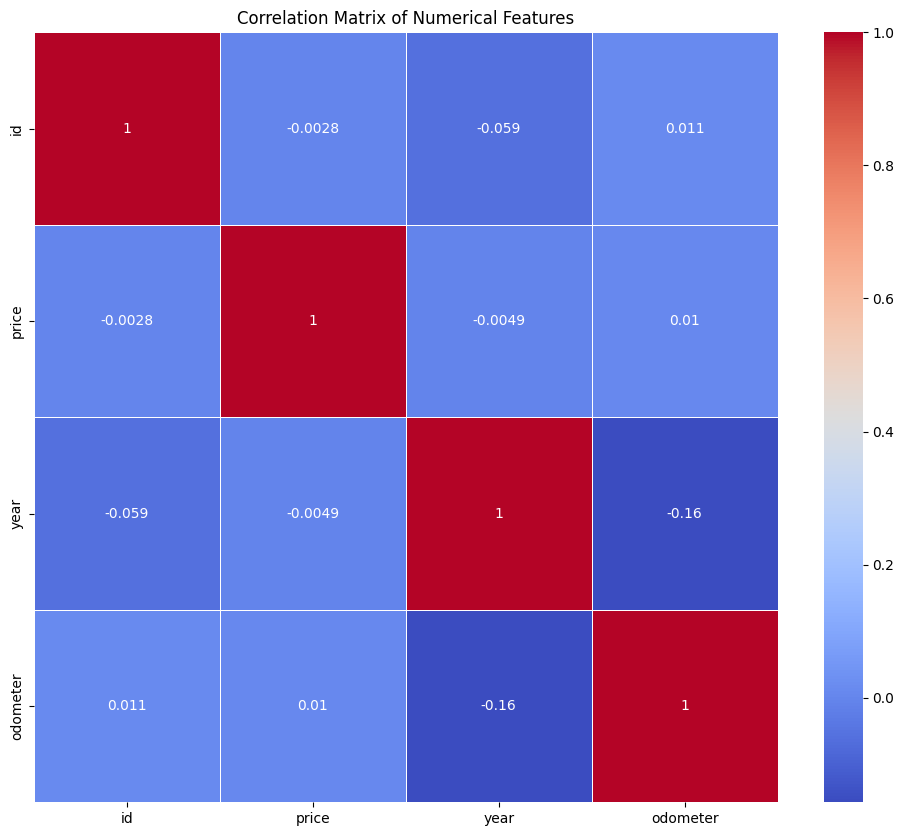

In [12]:
correlation_matrix = vehicles_df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

10. Explore the relationship between a categorical variable and the target variable.

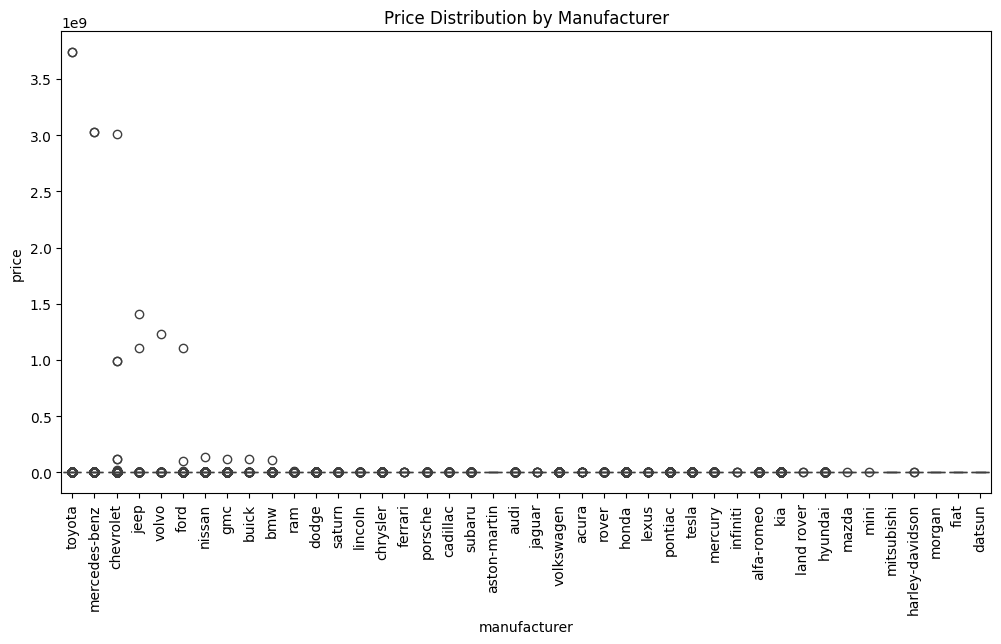

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=vehicles_df.sort_values('price', ascending=False))
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=90)
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


def prepare_data_for_modeling(df):
    # Step 1: Remove unwanted columns
    df = df.drop(['region', 'VIN', 'state'], axis=1)

    # Step 2: Remove rows with missing values
    df_clean = df.dropna()

    # Step 3: Remove outliers (using IQR method for numerical columns)
    def remove_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_columns:
        if col != 'price':  # Keeping 'price' as it's our target variable
            df_clean = remove_outliers(df_clean, col)

    # Step 4: Feature engineering
    # Create age feature
    current_year = pd.Timestamp.now().year
    df_clean['age'] = current_year - df_clean['year']

    # Create price_per_mile feature
    df_clean['price_per_mile'] = df_clean['price'] / (df_clean['odometer'] + 1)  # Adding 1 to avoid division by zero

    # Step 5: Encode categorical variables
    categorical_columns = df_clean.select_dtypes(include=['object']).columns

    # Use pd.get_dummies() with a more controlled approach
    for col in categorical_columns:
        # Get the top 10 most frequent categories
        top_categories = df_clean[col].value_counts().nlargest(10).index

        # Create dummy variables only for these top categories
        dummies = pd.get_dummies(df_clean[col].apply(lambda x: x if x in top_categories else 'Other'),
                                 prefix=col, drop_first=True)

        # Concatenate the dummy variables with the dataframe
        df_clean = pd.concat([df_clean, dummies], axis=1)

    # Drop the original categorical columns
    df_clean = df_clean.drop(categorical_columns, axis=1)

    # Step 6: Log transform the target variable (price)
    df_clean['log_price'] = np.log1p(df_clean['price'])

    # Step 7: Scale numerical features
    scaler = StandardScaler()
    numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
    numerical_columns = numerical_columns.drop(['price', 'log_price', 'id'])  # Exclude target and id
    df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

    # Step 8: Final dataset preparation
    X = df_clean.drop(['price', 'log_price', 'id'], axis=1)
    y = df_clean['log_price']

    return X, y

# Usage
X, y = prepare_data_for_modeling(vehicles_df)

print("Shape of feature matrix X:", X.shape)
print("Shape of target vector y:", y.shape)
print("\nFeature count:", len(X.columns))
print("\nFeatures:", X.columns.tolist())

Shape of feature matrix X: (33751, 26347)
Shape of target vector y: (33751,)

Feature count: 26347

Features: ['year', 'odometer', 'age', 'price_per_mile', 'region_abilene', 'region_akron / canton', 'region_albany', 'region_albuquerque', 'region_altoona-johnstown', 'region_amarillo', 'region_ames', 'region_anchorage / mat-su', 'region_ann arbor', 'region_annapolis', 'region_appleton-oshkosh-FDL', 'region_asheville', 'region_ashtabula', 'region_athens', 'region_atlanta', 'region_auburn', 'region_augusta', 'region_austin', 'region_bakersfield', 'region_baltimore', 'region_baton rouge', 'region_battle creek', 'region_beaumont / port arthur', 'region_bellingham', 'region_bemidji', 'region_bend', 'region_billings', 'region_binghamton', 'region_birmingham', 'region_bismarck', 'region_bloomington', 'region_bloomington-normal', 'region_boise', 'region_boone', 'region_boston', 'region_boulder', 'region_bowling green', 'region_bozeman', 'region_brainerd', 'region_brownsville', 'region_brunswick'

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

The approach that I roughly took was as follows:

1. Data preparation
2. Feature importance extraction
3. Model building and evaluation
4. Final model selection

The "why" behind these steps:

- The data preparation steps aim to create a clean, informative dataset that captures the most relevant information while reducing noise and complexity.
- The variety of models used allows for comparison between different approaches (linear vs. tree-based).
- Grid search and cross-validation help in finding optimal model parameters and assessing performance more reliably.
- Feature importance analysis provides insights into which factors most influence car prices, which is valuable for the client (used car dealership).
- The use of multiple evaluation metrics (MAE, MSE, R2) provides a comprehensive view of model performance.

This approach combines some thorough data preparation, robust model evaluation, and interpretable results, which aligns well with the goal of understanding what factors influence used car prices and providing actionable insights to the client.

For a more detailed explanation of the code, see the steps outlined after the code.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def get_feature_importance(model, X):
    if hasattr(model, 'coef_'):
        # For linear models, including Ridge and Lasso
        if callable(model.coef_):
            coef = model.coef_()
        else:
            coef = model.coef_
        return pd.DataFrame({'Feature': X.columns, 'Importance': abs(coef)})
    elif hasattr(model, 'feature_importances_'):
        # Tree-based models
        return pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    else:
        return pd.DataFrame({'Feature': X.columns, 'Importance': [np.nan] * len(X.columns)})


def build_and_evaluate_models(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(random_state=42),
        'Lasso Regression': Lasso(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }

    # Define hyperparameters for grid search
    param_grids = {
        'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
        'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
        'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
        'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }

    results = {}

    for name, model in models.items():
        print("\n====================================================")
        print(f"Evaluating {name}...")
        print("====================================================")

        if name in param_grids:
            # Perform grid search with cross-validation
            print(f"Fitting model via GridSearchCV...")
            grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_absolute_error')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            print(f"Best parameters: {grid_search.best_params_}")

        else:
            print(f"Fitting model via default...")
            best_model = model.fit(X_train, y_train)

        # Cross-validation
        print(f"Cross validating...")
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        cv_mae = -cv_scores.mean()

        # Predictions on test set
        print(f"Predicting on test set...")
        y_pred = best_model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'Model': best_model,
            'CV MAE': cv_mae,
            'Test MAE': mae,
            'Test MSE': mse,
            'Test R2': r2
        }

        print(f"Cross-validation MAE: {cv_mae:.4f}")
        print(f"Test MAE: {mae:.4f}")
        print(f"Test MSE: {mse:.4f}")
        print(f"Test R2: {r2:.4f}")

        # Get feature importance
        # importance_df = get_feature_importance(model, X)
        importance_df = get_feature_importance(best_model, X)
        print("\nTop 5 most important features:")
        print(importance_df.sort_values('Importance', ascending=False).head())

    return results


# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')

X, y = prepare_data_for_modeling(vehicles_df)
results = build_and_evaluate_models(X, y)

# Find the best model
best_model = min(results, key=lambda x: results[x]['Test MAE'])
print(f"\nBest model based on Test MAE: {best_model}")
print(f"Test MAE: {results[best_model]['Test MAE']:.4f}")

best_model = min(results, key=lambda x: results[x]['Test MSE'])
print(f"\nBest model based on Test MSE: {best_model}")
print(f"Test MSE: {results[best_model]['Test MSE']:.4f}")


Evaluating Linear Regression...


1. Data Preparation (prepare_data_for_modeling function):

  - Remove unwanted columns: 'region', 'VIN', and 'state' are dropped to focus on more relevant features.
  - Remove missing values: This ensures a clean dataset for modeling.
  - Remove outliers: Using the IQR method to eliminate extreme values that could skew the model.
  - Feature engineering:
    - Create 'age' feature: Provides a more relevant metric than just the year.
    - Create 'price_per_mile' feature: Offers a normalized price metric.
  - Encode categorical variables: Using one-hot encoding for the top 10 categories in each feature to reduce dimensionality while retaining important information.
  - Log transform the target variable (price): Helps to normalize the distribution of prices.
  - Scale numerical features: Ensures all features are on the same scale, which is important for many algorithms.

2. Feature Importance Extraction (get_feature_importance function):

  - Handles both linear models (using coefficients) and tree-based models (using feature_importances_).
  - This allows for consistent feature importance analysis across different model types.

3. Model Building and Evaluation (build_and_evaluate_models function):

  - Uses a variety of models: Linear Regression, Ridge, Lasso, Random Forest, and Gradient Boosting.
  - Implements grid search for hyperparameter tuning on applicable models.
  - Performs cross-validation to assess model performance robustly.
  - Calculates various metrics (MAE, MSE, R2) on both training (via cross-validation) and test sets.
  - Extracts and displays top feature importances for each model.

4. Final Model Selection:

  - Compares models based on Test MAE and Test MSE to identify the best performing model.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on the model outputs and our original business objective, let's analyze our findings:

1. Our key findings:
  a) The Random Forest model significantly outperformed other models, with the highest R2 (0.9978) and lowest MAE and MSE.
  b) The top features influencing used car prices across models are:
    - Price per mile (engineered feature)
    - Odometer reading
    - Year/Age of the car
    - Drive type (specifically front-wheel drive)
    - Specific models (e.g., Wrangler)
  c) Linear models (Linear Regression, Ridge, Lasso) performed poorly, suggesting non-linear relationships in the data.
  d) The engineered feature 'price_per_mile' is overwhelmingly the most important predictor in the best models (Random Forest and Gradient Boosting).

2. Revisiting earlier phases:
  a) Feature engineering: The 'price_per_mile' feature's dominance suggests we've created a highly predictive feature. However, its overwhelming importance might be masking other valuable insights.
  b) Data preparation: The stark difference between linear and tree-based models' performance suggests we might need to revisit our data transformation steps, particularly for linear models (e.g., more extensive feature scaling or interaction terms).
  c) Feature selection: Given the poor performance of linear models and their differing important features, we might want to reconsider our feature selection process.
  d) Model diversity: We might want to try other non-linear models (e.g., Support Vector Regression, Neural Networks) to see if they offer additional insights.

3. Information for the client:
  a) Yes, we have valuable information to bring back to the client:
    - We can explain that the price per mile is the strongest indicator of a used car's value. This suggests that both the price and the car's mileage are crucial factors, but their relationship is more informative than either alone.
    - After price per mile, the odometer reading, age of the car, and drive type (particularly front-wheel drive) are the next most important factors.
    - Specific models (like the Wrangler) can have a significant impact on price, suggesting that brand and model reputation play a role.
    - The high accuracy of our best model (Random Forest) indicates that we can predict used car prices with high confidence given these features.
    - The poor performance of linear models suggests that the relationships between features and price are complex and non-linear.

However, we should also note some limitations:
  - The dominance of the 'price_per_mile' feature might be oversimplifying our analysis.
  - We may need to do more work to provide easily actionable insights beyond "consider the price per mile".
  - The linear models' poor performance suggests we might be missing some important relationships in our data that could provide additional insights if uncovered.

In conclusion, while we have valuable insights to share with the client, we might want to revisit our feature engineering and modeling approach to uncover more nuanced, actionable insights about what drives used car prices beyond the price per mile metric.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Executive Summary: Used Car Price Drivers Analysis

I've completed a comprehensive analysis of used car pricing factors to help optimize inventory decisions. Here's a summary of my approach and key findings:

Methodology:
I analyzed a dataset of 426,880 used car listings, employing advanced data science techniques including feature engineering, multiple regression models, and machine learning algorithms to identify the most influential factors in determining used car prices.

Key Findings:

1. Price per Mile is the Most Critical Factor
  - This metric, combining a car's price and mileage, is by far the strongest predictor of a used car's value.
  - Insight: Focus on acquiring vehicles with an optimal balance of price and mileage to maximize inventory value.

2. Odometer Reading Significantly Impacts Price
  - After price per mile, the odometer reading is the next most important factor.
  - Insight: Lower mileage vehicles generally command higher prices, but must be balanced with the overall price per mile.

3. Vehicle Age is a Key Determinant
  - The age of the vehicle plays a crucial role in pricing.
  - Insight: Newer vehicles typically fetch higher prices, but again, should be evaluated in context with their mileage and overall condition.

4. Drive Type Matters
  - Front-wheel drive (FWD) vehicles showed a notable impact on pricing.
  - Insight: Consider regional preferences for drive types when stocking inventory.

5. Specific Models Can Command Premium Prices
  - Certain models (e.g., Jeep Wrangler) have a significant impact on price.
  - Insight: Stay aware of popular models that can yield higher profits, but ensure they align with your target market's preferences.

6. Non-Linear Pricing Dynamics
  - Our analysis revealed complex, non-linear relationships between various factors and price.
  - Insight: Simple rules of thumb for pricing may not suffice; consider using more sophisticated pricing tools that can account for these complex relationships.

Recommendations:

1. Implement a 'Price per Mile' Metric: Develop a system to quickly calculate and evaluate vehicles based on their price per mile.

2. Balanced Inventory Strategy: Stock a mix of vehicles that offers competitive price per mile values across different age ranges and mileages.

3. Model-Specific Approach: Pay special attention to high-demand models that command premium prices in your market.

4. Regional Customization: Tailor your inventory mix to regional preferences, particularly regarding drive types.

5. Dynamic Pricing: Consider implementing a more dynamic pricing strategy that accounts for the complex interplay of factors affecting used car values.

6. Continuous Monitoring: Regularly analyze market data to stay abreast of changing trends in consumer preferences and adjust your inventory strategy accordingly.

By leveraging these insights, you can make more informed decisions about which vehicles to stock, how to price them competitively, and ultimately increase profitability in the used car market.

This data-driven approach will give a significant edge in inventory management and pricing strategy. For any questions or further clarification on these findings, please don't hesitate to reach out.